# <p style="color:darkblue">Fatal Police Shooting</p>

<hr>


In this Jupyter-Notebook, I will conduct an analysis of Fatal Police Shootings in the US using supervised machine learning algorithms. The input features for the analysis will be extracted from the dataset obtained from the Kaggle platform, and the output will indicate whether the individual exhibited signs of mental illness, classified as positive or negative. We will follow a step-by-step process, starting from dataset preprocessing and continuing to model validation.

<a href="https://colab.research.google.com/github/lauradefaria/Machine_Learning_and_data_analysis/blob/main/Fatal%20Shooting/Fatal-Police-Shooting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Reading Data


At first, we will import all the libraries that will be used throughout the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

Let's read the dataset that will be used for this work. The dataset can be downloaded from Kaggle or accessed from the repository of this class.

In [2]:
df_path = "https://raw.githubusercontent.com/lauradefaria/Machine_Learning_and_Data_Analysis/main/Fatal-Police-Shooting/PS-Dataset/PoliceKillingsUS.csv"

In [3]:
df = pd.read_csv(df_path, encoding='cp1252', index_col=0)
print("Dataset size : ", df.shape)

Dataset size :  (2535, 13)


# 2. Data Analysis

Initially, a brief analysis will be conducted on the attributes of the dataset to assess their relevance to the problem at hand:
* ***name:*** Name of the deceased
* ***date:*** Date of the occurrence
* ***manner_of_death:*** Manner in which the victim was killed
* ***armed:*** Whether the victim was holding an object (or unarmed)
* ***age:*** Age of the victim
* ***gender:*** Gender of the victim (Male/Female)
* ***race:*** Race of the victim (Asian/Whine/Native American/Black/Hispanic)
* ***city:*** City where the occurrence took place
* ***state:*** State in the US where the occurrence took place
* ***signs_of_mental_illness:*** Indication of whether the victim exhibited signs of mental illness
* ***threat_level:*** Whether the victim posed a threat to the officer or not
* ***body_camera:*** Whether the officer was using a body camera or not
* ***flee:*** Whether the victim fled the scene or not

In [4]:
df

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False


In [5]:
df["signs_of_mental_illness"].value_counts()

False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

#3. Data Preprocessing

It plays a crucial role in the data analysis process as raw data is often dirty, inconsistent, and not ready to be directly used in machine learning algorithms or other analytical techniques. A generalized step-by-step process would be:

* Data cleaning: Identification and handling of any issues in the data, such as missing data, duplicated values, noise, or outliers.

* Class balancing (optional): It may be necessary to apply class balancing techniques, such as oversampling (increasing the minority class) or undersampling (reducing the majority class).

* Data transformation: Next, data transformation techniques are applied, which may include normalization or standardization of values, encoding categorical variables into numerical formats, or creating new features from existing ones.

* Feature selection: If the dataset contains many attributes, feature selection is performed to reduce dimensionality and improve the efficiency and accuracy of models. This can be done using techniques such as correlation analysis, principal component analysis (PCA), or feature selection algorithms.

* Data splitting: The data is divided into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance.


A quick analysis of the raw data from the provided CSV file was conducted, and it was decided that some attribute removals would be beneficial during the loading process:

* Removing ***'name'***: It was deemed unnecessary since using it as an input parameter or target would be detrimental to the model, given that each object has a unique label (each individual's name is unique).
* Removing ***'date'***: Similar to 'name', there is subjectivity in the attribute, leading to its exclusion.
* Removing ***'city'***: It becomes unnecessary since there is already an attribute related to the state.

In [6]:
df.drop(columns=["name", "date"], axis=1, inplace=True)

## 3.1 Removing 'NaN' values


There are several possibilities for dealing with missing data, and below I will mention some of them along with their benefits:

* **Instance deletion**: Useful when the amount of missing data is small compared to the dataset size. Deletion can preserve the integrity of the remaining data, but it may lead to a reduced dataset and loss of information.

* **Attribute deletion:** Variables with a large number of NaN values are removed. This approach is good when the attribute is not essential for the analysis, but it may result in the loss of important information.

* **Filling with fixed values**: Using mean, median, or mode. This approach can be detrimental when there is a high number of NaN values, as it can introduce bias into the data.

* **Statistical imputation**: Estimated using statistical techniques (e.g., KNN or Linear Regression). Provides more accurate estimates and is more suitable when the data is informative.

* **Implementing Machine Learning algorithms**: Utilizing predictive models such as Decision Trees. Appropriate when missing data is related to complex patterns.

In [7]:
nan_counts = df.isna().sum()
print(nan_counts)

manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


Afterwards, the number of instances with NaN values was evaluated for each attribute and it was observed that there were 195 missing instances for ***'race'***, 9 for ***'armed'***, and 65 for ***'flee'***. Since the dataset has a significantly larger number of instances compared to the missing data, it was decided to remove these instances to ensure the integrity of the remaining data.

In [8]:
df['race'].replace('', np.nan, inplace=True)
df.dropna(subset=['race'], inplace=True)

df['flee'].replace('', np.nan, inplace=True)
df.dropna(subset=['flee'], inplace=True)

df['armed'].replace('', np.nan, inplace=True)
df.dropna(subset=['armed'], inplace=True)

Regarding the attribute ***'age'***, it has been decided to use statistical imputation with the KNN method. This method was chosen as linear regression is more effective when there is correlation among variables and patterns in the data. Additionally, KNN exhibits better performance compared to simple methods (such as fixed values) taking into account the structure and relationship of the data, thereby providing more accurate estimates.

In [9]:
imputer = KNNImputer(n_neighbors=5, weights ="distance")

df["age"] = imputer.fit_transform(df[["age"]])

nan_counts = df.isna().sum()
print(nan_counts)

manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64


##3.2 Inconsistencies and Duplicates Removal

This process is performed to avoid inconsistencies in the data, increase the reliability, quality of the results, and improve the performance of the models:

* It is inconsistent to state that the individual's age is less than 0.0
* Duplicate rows in the DataFrame are also discarded

In [10]:
correct = df["age"] >= 0.00
df = df[correct]

df.drop_duplicates()

,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,
3,shot,gun,53.000000,M,A,Shelton,WA,True,attack,Not fleeing,False
4,shot,gun,47.000000,M,W,Aloha,OR,False,attack,Not fleeing,False
5,shot and Tasered,unarmed,23.000000,M,H,Wichita,KS,False,other,Not fleeing,False
8,shot,toy weapon,32.000000,M,W,San Francisco,CA,True,attack,Not fleeing,False
9,shot,nail gun,39.000000,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...
2808,shot,vehicle,25.000000,M,B,Dayton,OH,False,attack,Car,False
2820,shot,gun,39.000000,M,B,Homer,LA,False,attack,Car,False
2812,shot,knife,36.254215,M,H,Chowchilla,CA,False,attack,Not fleeing,False


## 3.3 Balance

To address an imbalance in the distribution of classes in the dataset, a random oversampling of the dataframe is performed, artificially increasing the quantity of objects in the minority classes. Class imbalance can be problematic in machine learning problems, especially in classification tasks, as it can lead to bias in the resulting model.

In [16]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X = df.drop(['signs_of_mental_illness'], axis=1)
y = df.signs_of_mental_illness
X_resampled, y_resampled = ros.fit_resample(X, y)

<Axes: xlabel='signs_of_mental_illness', ylabel='count'>

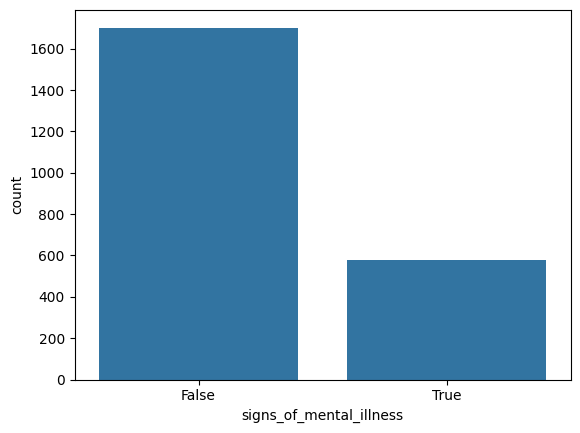

In [20]:
import seaborn as sns

#Before
sns.countplot(x=y)

<Axes: xlabel='signs_of_mental_illness', ylabel='count'>

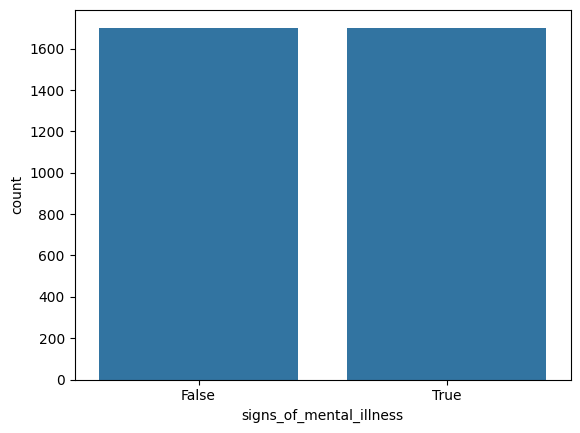

In [21]:
#After
sns.countplot(x=y_resampled)

## 3.4 Transformação dos dados

### 3.4.1 One-Hot-Encoding


One-hot encoding is a technique in machine learning used to represent categorical variables numerically. It works by converting categorical variables into a binary matrix where each category is represented by a binary value (0 or 1). Here's how it works: first, you identify all unique categories present in the categorical variable. Then, for each unique category, a new binary column is created. If a data point belongs to a particular category, the corresponding binary column is set to 1; otherwise, it's set to 0.

One-hot encoding is widely used in machine learning, especially in scenarios where categorical variables need to be transformed into a format that can be processed by algorithms expecting numerical input. It's important to note that one-hot encoding increases the dimensionality of the dataset but is necessary for many algorithms to properly interpret categorical data.

In [22]:
threat_bin = lambda string : 1 if string == "attack"  else 0

# Convert to attack or not attack (0 or 1)
df["threat_level"] = df["threat_level"].apply(threat_bin)

In [ ]:
manner_of_death_bin = lambda string : 1 if string == "shot"  else 0

# Convert Shot or Shot & Tasered (0 or 1)
df["manner_of_death"] = df["manner_of_death"].apply(manner_of_death_bin)

In [ ]:
gender_bin = lambda string : 1 if string == "M" else 0

# Convert to Male or Female (0 or 1)
df["gender"] = df["gender"].apply(gender_bin)

In [ ]:
df

In [ ]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df['armed'])

# Concatenate the one-hot encoded columns with the original dataframe
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_encoded['race'])

# Concatenate the one-hot encoded columns with the original dataframe
df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

In [ ]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_encoded['flee'])

# Concatenate the one-hot encoded columns with the original dataframe
df = pd.concat([df_encoded, one_hot_encoded], axis=1)

In [ ]:
df

### 3.4.2 Data Normalization

Data normalization serves to place all variables or features on a common scale, typically between 0 and 1, so that they can be appropriately compared or combined. This procedure is important for algorithms sensitive to scale (e.g., K-means) or when Euclidean distance is used as a measure of similarity between samples or in the application of clustering algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting the numeric columns for normalization
numColumns = df.select_dtypes(include='number').columns

# Creating an instance of the StandardScaler
scaler = StandardScaler()

# Applying the min-max scale to the selected columns
df[numColumns] = scaler.fit_transform(df[numColumns])

## 3.5 Boxplot

With a boxplot, it's possible to identify the presence of outliers, the symmetry of the distribution, the concentration of data around the median, and the variation in the data. This information helps to understand the shape of the distribution and to detect possible anomalous values.

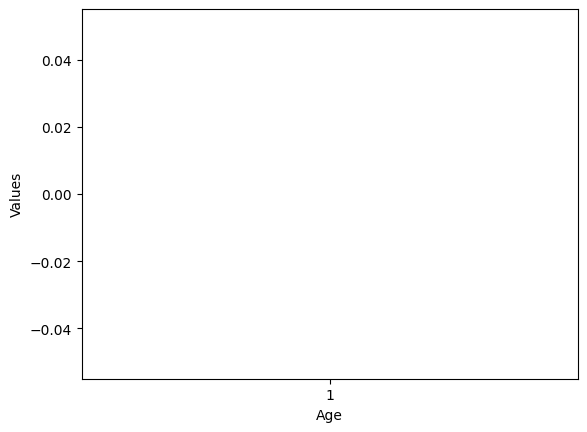

In [9]:
#Boxplot
fig = plt.figure()
plt.ylabel("Values")
plt.xlabel("Age")
plt.boxplot([df['age'].values])
plt.show()

## 3.5 Input and Output

- The attribute 'sings_of_mental_illness' was selected as the output variable of the model for several reasons. First, its completeness of data in all rows was considered crucial to ensure consistency during model training. Additionally, its binary nature, with only two possible outputs (True or False), makes it suitable for a classification problem. This simplicity is advantageous for the prediction process, where the goal is to categorize an instance into one of two classes.

- The input attributes are being represented by 'X', while the target attribute by 'y'.

### 3.5.1 Define Target

In [ ]:
#To avoid the target attribute from being included with the input attributes
df_copy = df.copy()
X = df_copy.drop('signs_of_mental_illness', axis=1)

#Define 'signs_of_mental_illness' as target (output)
y = df_copy["signs_of_mental_illness"]

### 3.5.2 Amostragem

## 3.6 Pipeline para redução da dimensionalidade dos dados

### 3.6.1 Correlação Inicial

### 3.6.2 Comparação entre a dimensão final e inicial

#4. Aprendizagem Supervisionada

## 4.1 DecisionTree

## 4.2 KNN

## 4.3 RandomForest

## 4.4 Naive Bayes